In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
def rename(df):
    df['modelname'] = df['modelname'].replace('euclidean', 'Least squares K-means \n (sign-flipped eigenvectors)')
    df['modelname'] = df['modelname'].replace('diametrical', 'Diametrical clustering')
    df['modelname'] = df['modelname'].replace('grassmann', 'Grassmann clustering')
    df['modelname'] = df['modelname'].replace('weighted_grassmann', 'Weighted Grassmann clustering')
    df['modelname'] = df['modelname'].replace('Watson', 'Watson mixture')
    df['modelname'] = df['modelname'].replace('ACG_fullrank', 'Angular central Gaussian mixture')
    df['modelname'] = df['modelname'].replace('MACG_fullrank', 'Matrix angular central Gaussian mixture')
    df['modelname'] = df['modelname'].replace('SingularWishart_fullrank', 'Singular Wishart mixture')
    
    names = []
    for i in range(len(df)):
        if df['modelname'][i] in ['ACG','MACG','Singular Wishart']:
            names.append(df['modelname'][i]+' rank='+str(df['ACG_rank'][i]))
        else:
            names.append(df['modelname'][i])
    df['names'] = names
    return df

First the K-means

In [27]:
data_folder = '../data/results/torchvsEM_phase_controlled_results/'
df1 = pd.read_csv(data_folder+'phase_controlled_euclidean.csv')
df2 = pd.read_csv(data_folder+'phase_controlled_diametrical.csv')
df3 = pd.read_csv(data_folder+'phase_controlled_grassmann.csv')
df4 = pd.read_csv(data_folder+'phase_controlled_weighted_grassmann.csv')
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df = rename(df)

(0.0, 1.0)

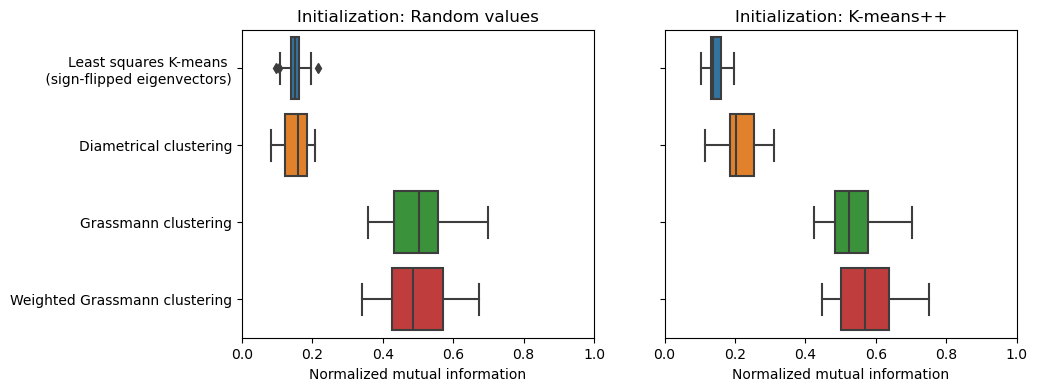

In [28]:
fig,axs = plt.subplots(1,2,figsize=(10,4), sharey=True)
sns.boxplot(x='train_NMI', y='names', data=df[df['init']=='unif'], ax=axs[0])
axs[0].set_xlabel('Normalized mutual information')
axs[0].set_ylabel('')
axs[0].set_title('Initialization: Random values')
axs[0].set_xlim([0,1])
sns.boxplot(x='train_NMI', y='names', data=df[df['init']=='++'], ax=axs[1])
axs[1].set_xlabel('Normalized mutual information')
axs[1].set_ylabel('')
axs[1].set_title('Initialization: K-means++')
axs[1].set_xlim([0,1])

The mixture